In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

df_binary = pd.read_csv('clean_data.csv')
df_categories = pd.read_csv('data.csv')

df_binary = df_binary.dropna(subset=['text']) #clean dataset
df_categories['severity_rating'] = [1 if n > 1 else n for n in df_categories['severity_rating']]
df_categories.rename(columns={'severity_rating': 'is_offensive'}, inplace=True)

# Combine the two datasets
df_combined = pd.concat([df_binary, df_categories], axis=0)

# Split the data for binary classification
X_train, X_test, y_train, y_test = train_test_split(df_combined['text'], df_combined['is_offensive'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

print(classification_report(y_test, y_pred))

# Split the data for category classification
X_train, X_test, y_train, y_test = train_test_split(df_categories['text'], df_categories['category_1'], test_size=0.2, random_state=42)

# Use the same vectorizer for category classification
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Model for category classification
category_clf = MultinomialNB()
category_clf.fit(X_train_vec, y_train)


#Generate dump of both ML models
joblib.dump(clf, 'profanityFilter.pkl')
joblib.dump(category_clf, 'profanityType.pkl')

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     29502
         1.0       0.85      0.83      0.84      7688

    accuracy                           0.93     37190
   macro avg       0.90      0.89      0.90     37190
weighted avg       0.93      0.93      0.93     37190



['profanityType.pkl']

In [2]:
import joblib

#load models
clf = joblib.load('profanityFilter.pkl')
category_clf = joblib.load('profanityType.pkl')

# Test the model
phrase = ["You are gay!!!!"]
phrase_vec = vectorizer.transform(phrase)

# Predict if the phrase is offensive
is_offensive = clf.predict(phrase_vec)

# Determine the category
if is_offensive[0] == 1:
    category = category_clf.predict(phrase_vec)
    print(f"The phrase is offensive and belongs to category [{category[0]}]")
else:
    print("The phrase is not offensive.")

The phrase is offensive and belongs to category [sexual anatomy / sexual acts]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

data = pd.read_csv('clean_data.csv')
data = data.dropna(subset=['text']) #clean dataset

# Separate the offensive and non-offensive texts
offensive_texts = ' '.join(data[data['is_offensive'] == 1]['text'])
non_offensive_texts = ' '.join(data[data['is_offensive'] == 0]['text'])

offensive_counts = data['is_offensive'].value_counts()
labels = ['Non-offensive', 'Offensive']
colors = ['lightgreen', 'lightcoral']
plt.pie(offensive_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Offensive vs. Non-offensive Texts')
plt.show()

# Generate a word cloud for offensive texts
wordcloud_offensive = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='firebrick').generate(offensive_texts)

# Generate a word cloud for non-offensive texts
wordcloud_non_offensive = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(non_offensive_texts)

# Plot the word clouds
plt.figure(figsize=(20, 10))

# Offensive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_offensive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Texts')

# Non-offensive word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_offensive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Offensive Texts')

plt.show()

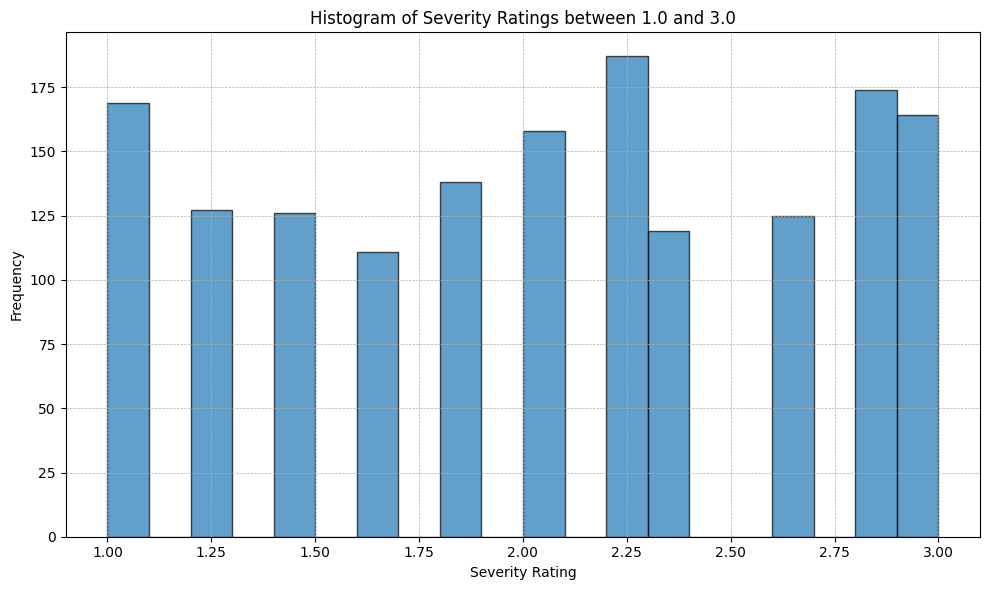

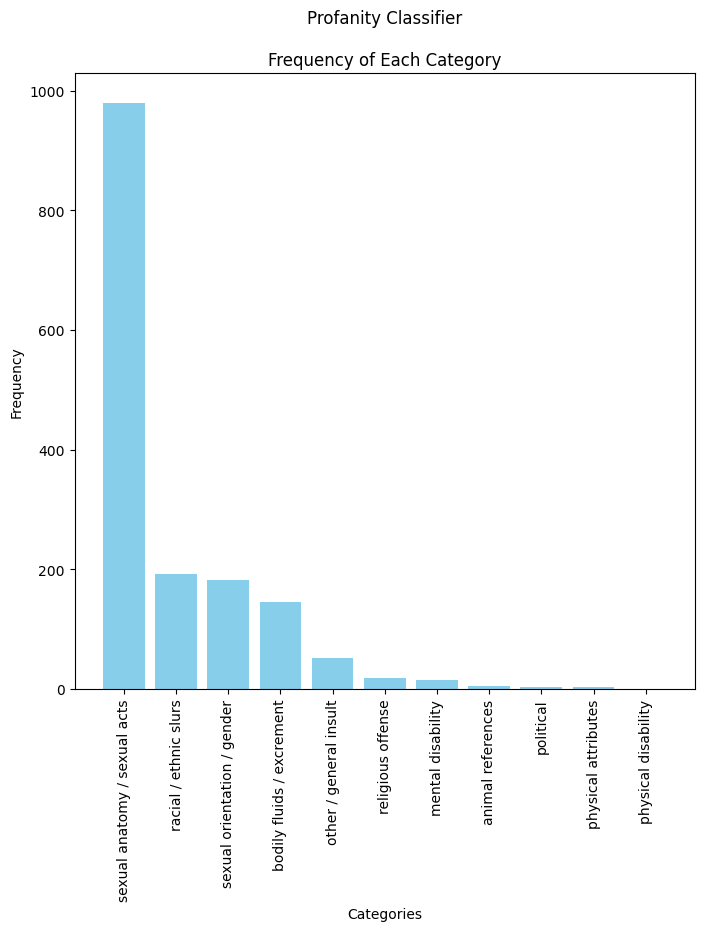

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_categories = pd.read_csv('data.csv')
df_categories_counts = df_categories['category_1'].value_counts()

# Sample data
categories = df_categories_counts.index
values = df_categories_counts.values

###### GENERATE HISTOGRAM #######
filtered_data = df_categories[(df_categories['severity_rating'] >= 1.0) & (df_categories['severity_rating'] <= 3.0)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['severity_rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Severity Ratings between 1.0 and 3.0')
plt.xlabel('Severity Rating')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

###### GENERATE BAR GRAPH #######
plt.figure(figsize=(8, 8))  # Increase figure size
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=90)  # Increase rotation angle
plt.title('Profanity Classifier\n\nFrequency of Each Category')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()
